<a href="https://colab.research.google.com/github/alokmangat/loan-prediction/blob/main/Loan_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Loan_data=pd.read_csv('/content/loan.csv')

In [ ]:
# First five rows of data frame
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# Number of rows and columns
Loan_data.shape

(614, 13)

In [ ]:
# Statical measures of data
Loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
Loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
Loan_data=Loan_data.dropna()

In [ ]:
# After dropping null values
Loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# replace loan status N with 0 and Y with 1
Loan_data.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [ ]:
# After replacing the loan status values
Loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
# values count of dependence column
Loan_data["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# replacing value of 3+ to 4
Loan_data=Loan_data.replace(to_replace='3+',value=4)

In [ ]:
# values count of dependence column after replacing the value
Loan_data["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

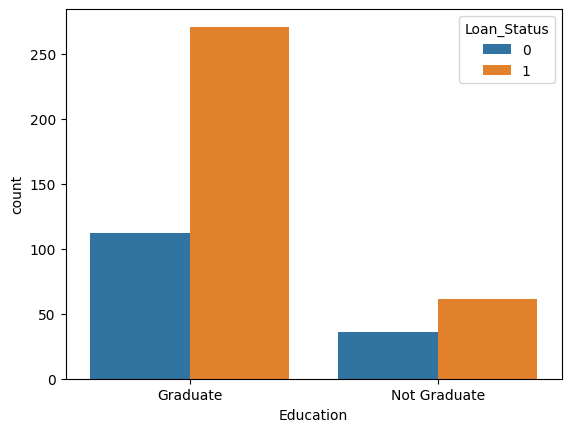

In [ ]:
sns.countplot(x="Education",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='Married', ylabel='count'>

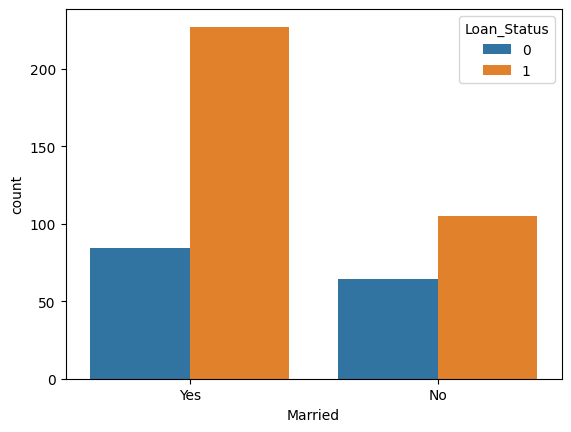

In [ ]:
sns.countplot(x="Married",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='Gender', ylabel='count'>

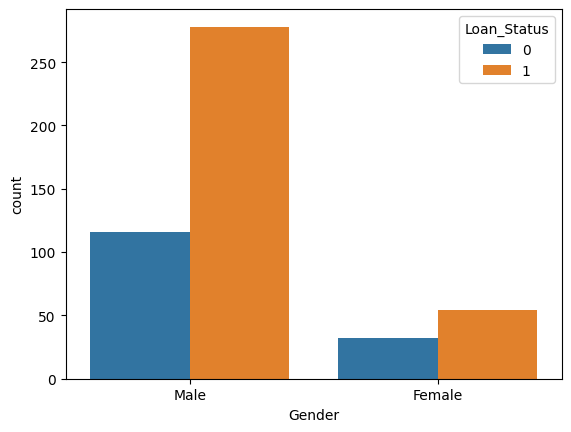

In [ ]:
sns.countplot(x="Gender",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='Dependents', ylabel='count'>

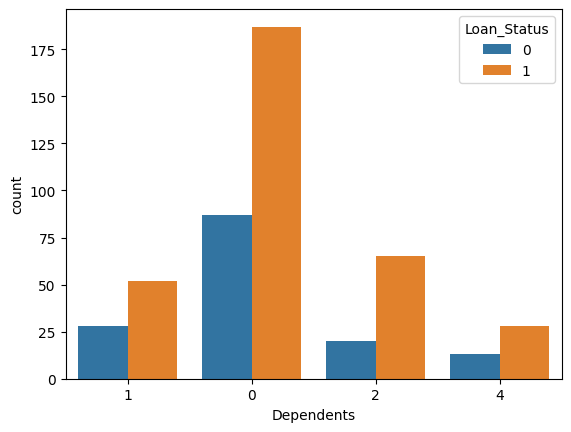

In [ ]:
sns.countplot(x="Dependents",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='Self_Employed', ylabel='count'>

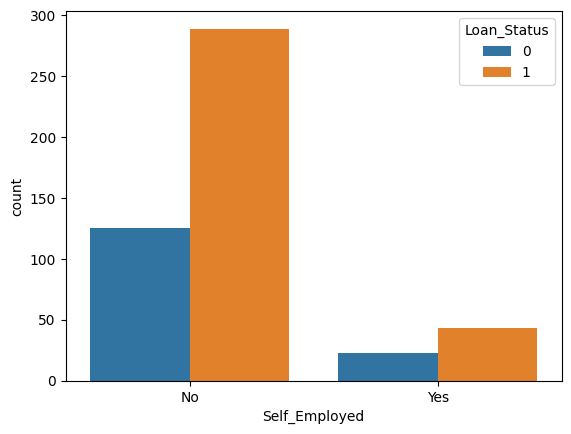

In [ ]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='ApplicantIncome', ylabel='count'>

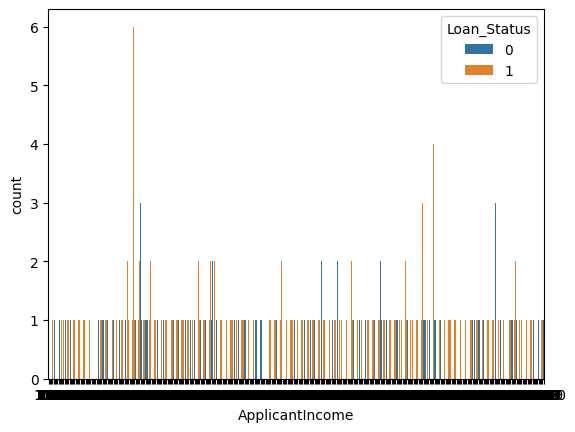

In [ ]:
sns.countplot(x="ApplicantIncome",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='CoapplicantIncome', ylabel='count'>

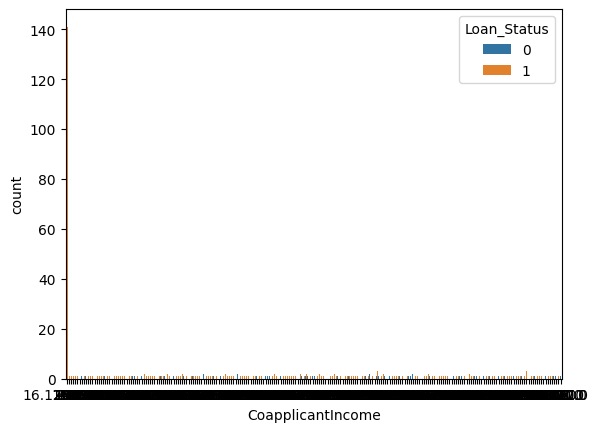

In [ ]:
sns.countplot(x="CoapplicantIncome",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='LoanAmount', ylabel='count'>

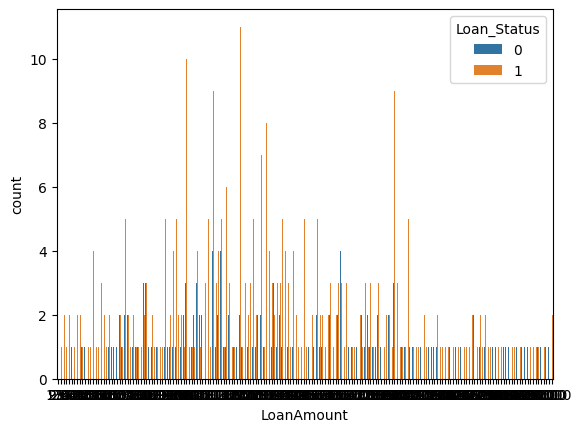

In [ ]:
sns.countplot(x="LoanAmount",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

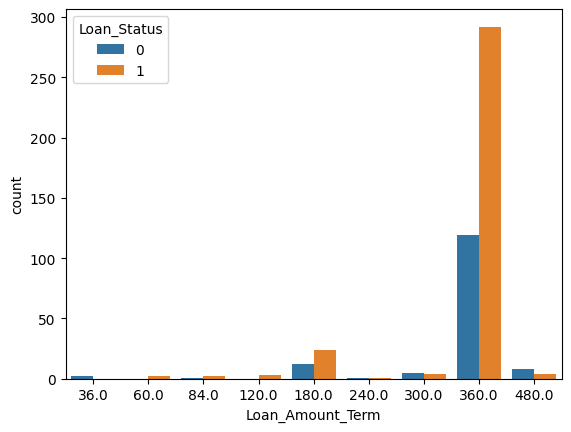

In [ ]:
sns.countplot(x="Loan_Amount_Term",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='Credit_History', ylabel='count'>

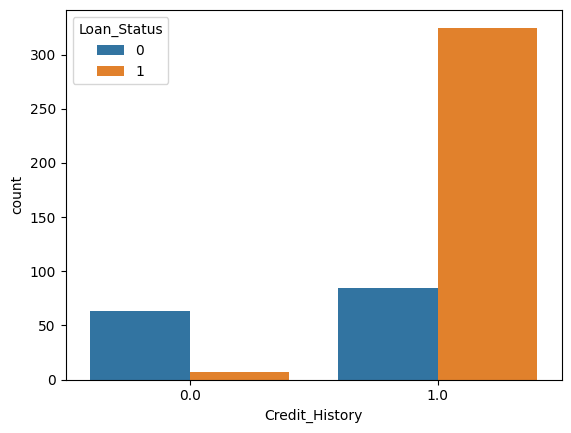

In [ ]:
sns.countplot(x="Credit_History",hue="Loan_Status",data=Loan_data)

<Axes: xlabel='Property_Area', ylabel='count'>

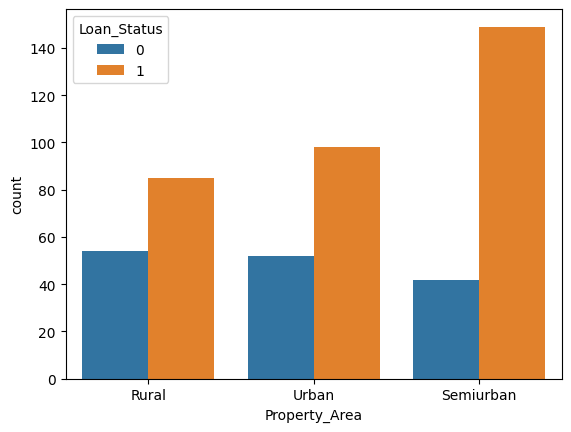

In [ ]:
sns.countplot(x="Property_Area",hue="Loan_Status",data=Loan_data)

In [ ]:
# replacing the non numerical to numerical value
Loan_data.replace({'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},
            'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}},inplace=True)

In [ ]:
Loan_data.head()

In [ ]:
# seprating the data and labels
Data=Loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Labels=Loan_data['Loan_Status']

In [ ]:
print(Data)
print(Labels)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Trian Test Split


In [ ]:
Data_train,Data_test,Labels_train,Labels_test=train_test_split(Data,Labels,test_size=0.1,stratify=Labels,random_state=2)

In [ ]:
print(Data.shape,Data_train.shape,Data_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model:

Support Vector Machine

In [ ]:
classifier=svm.SVC(kernel='linear')

In [ ]:
#training the support vector machine
classifier.fit(Data_train,Labels_train)

SVC(kernel='linear')

**Model** **Evaluation**

In [ ]:
#accuracy on training data
Data_train_prediction=classifier.predict(Data_train)
training_data_accuracy=accuracy_score(Data_train_prediction,Labels_train)

In [ ]:
print("Accuracy of the training data :",training_data_accuracy)

Accuracy of the training data : 0.7986111111111112


In [ ]:
#accuracy on training data
Data_test_prediction=classifier.predict(Data_test)
testing_data_accuracy=accuracy_score(Data_test_prediction,Labels_test)

In [ ]:
print("Accuracy of the testing data :",testing_data_accuracy)

Accuracy of the testing data : 0.8333333333333334


Making a predictive sysyem


In [ ]:
Data_input=(1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2)
Data_input_as_numpy_array=np.asarray(Data_input)

#reshape the numpy array as we predict for one instance

Data_input_reshape = Data_input_as_numpy_array.reshape(1,-1)

prediction=classifier.predict(Data_input_reshape)
print(prediction)
if(prediction[0]==0):
  print("loan is not approved")
else:
  print("loan is approved")

[1]
loan is approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
